# **Импорт необходимых библиотек**

In [ ]:
import os
import nltk
!pip install pymorphy2
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk import DependencyGraph, Tree
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('russian')
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import re
import pandas as pd
!pip install pymystem3
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


# **Подготовка списка предложений, которые содержат слово "степь" и его производные**

In [ ]:
# загрузка таблицы, в которой содержатся данные по текстам
texts = pd.read_csv("texts_orb.csv")
texts

,Автор,Название,Год,Файл
0,Аксаков С.Т.,Детские годы Багрова-внука,1858,Aksakov_Detskiye_gody.txt
1,Аксаков С.Т.,Семейная хроника,1856,Aksakov_Hronika.txt
2,Аксаков С.Т.,Записки ружейного охотника Оренбургской губернии,1852,Aksakov_Zapiski_ohotnika.txt
3,Аношкин М.П.,А как зовут дочь,1978,Anoshkin_Kak_zovut_doch.txt
4,Бадьева Э.А.,Портрет на солнечной стороне,1959,Badyieva_Portret_na_slonechnoy_storone.txt
5,Валеев Р.,Должно же быть в жизни что-то такое,1974,Valeev_Dolzhno_zhe_byt_v_zhizni_chto-to_takoye...
6,Гавриленко И.,Хозяин,1981,Gavrilenko_Hozyain.txt
7,Гусев-Оренбургский С.И.,Страна отцов,1905,Gusev_Strana_otcov.txt
8,Даль В.И.,Уральский казак,1843,Dal_Uralskiy_Kazak.txt
9,Короленко В.Г.,У казаков,1901,Korolenko_U_kazakov.txt


In [ ]:
# Выгрузка из таблицы списка имен файлов
index = list(range(0,len(texts)))
files_orb = []
for i in index:
    f = texts.iloc [i]['Файл']
    files_orb.append(f)

In [ ]:
# Создание списка искомых предложений
target_sent_orb = [] #creating a list for target sentences
for i in files_orb:
    with open(i, "r", encoding='utf-8') as open_file:
        text = open_file.read() # reading a file from the list of files
        text = text.replace("\n", " ") # удаление лишних символов
        text = text.replace("\xa0", "") # удаление лишних символов
        text = text.replace("\t\t", "") # удаление лишних символов
    sentence = sent_tokenize(text)
    for j in sentence:
        result = re.search(r'[С,с]теп[ьиян].{0,2}|[С,с]тепей', j)
        if not result == None:
            j = j.lower()
            target_sent_orb.append(j) # finding sentences with a target word and its derivatives and adding target sentences into the list
# target_sent_orb[0:20]

In [ ]:
# len(target_sent_orb)

946

In [ ]:
#  target_sent_orb[0:100]

['отец думал, что мать побоится ночной сырости; но место было необыкновенно сухо, никаких болот, и даже лесу не находилось поблизости, потому что начиналась уже башкирская степь; даже влажности ночного воздуха не было слышно.',
 'для меня опять готовилось новое зрелище; отложили лошадей, хотели спутать и пустить в поле, но как степные травы погорели от солнца и завяли, то послали в деревню за свежим сеном и овсом и за всякими съестными припасами.',
 'небо сверкало звездами, воздух был наполнен благовонием от засыхающих степных трав, речка журчала в овраге, костер пылал и ярко освещал наших людей, которые сидели около котла с горячей кашицей, хлебали ее и весело разговаривали между собою; лошади, припущенные к овсу, также были освещены с одной стороны полосою света… «не пора ли спать тебе, сережа?» – сказал мой отец после долгого молчания; поцеловал меня, перекрестил и бережно, чтоб не разбудить мать, посадил в карету.',
 'я видел, будто сквозь сон, как он садился, как тронулась карета 

# **Парсинг предложений с помощью UdPipe**

In [ ]:
# Установка необходимых библиотек для синтаксического парсинга
!pip install ufal.udpipe
!pip install graphviz
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.0/937.0 kB 42.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ufal.udpipe import Model, Pipeline
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} 'https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true'
model = Model.load(UDPIPE_MODEL_FN)
pipeline = Pipeline(model, 'generic_tokenizer', '','','')

--2023-06-17 17:28:05--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2023-06-17 17:28:05--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2023-06-17 17:28:05--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

### **Задали функцию для синтаксического парсинга**

In [ ]:
def conllu_to_list(parser_result): # аргумент - это conllu-файл, который получили в результате синтаксического анализа
    sents_orb = []
    for sent in parser_result.split('\n\n'): # удаление комментариев
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')]) # замена регистра для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents_orb.append(sent)
    return sents_orb

### **Парсинг**

In [ ]:
parsed_orb = []
for i in target_sent_orb:
    parsed = pipeline.process(i)
    # print(parsed)
    parsed_orb.append(parsed)


In [ ]:
ud_parsed_orb = []
for i in parsed_orb:
  ud = conllu_to_list(i)
  ud_parsed_orb.append(ud)
# ud_parsed_orb

### **Рисование синтаксических деревьев**

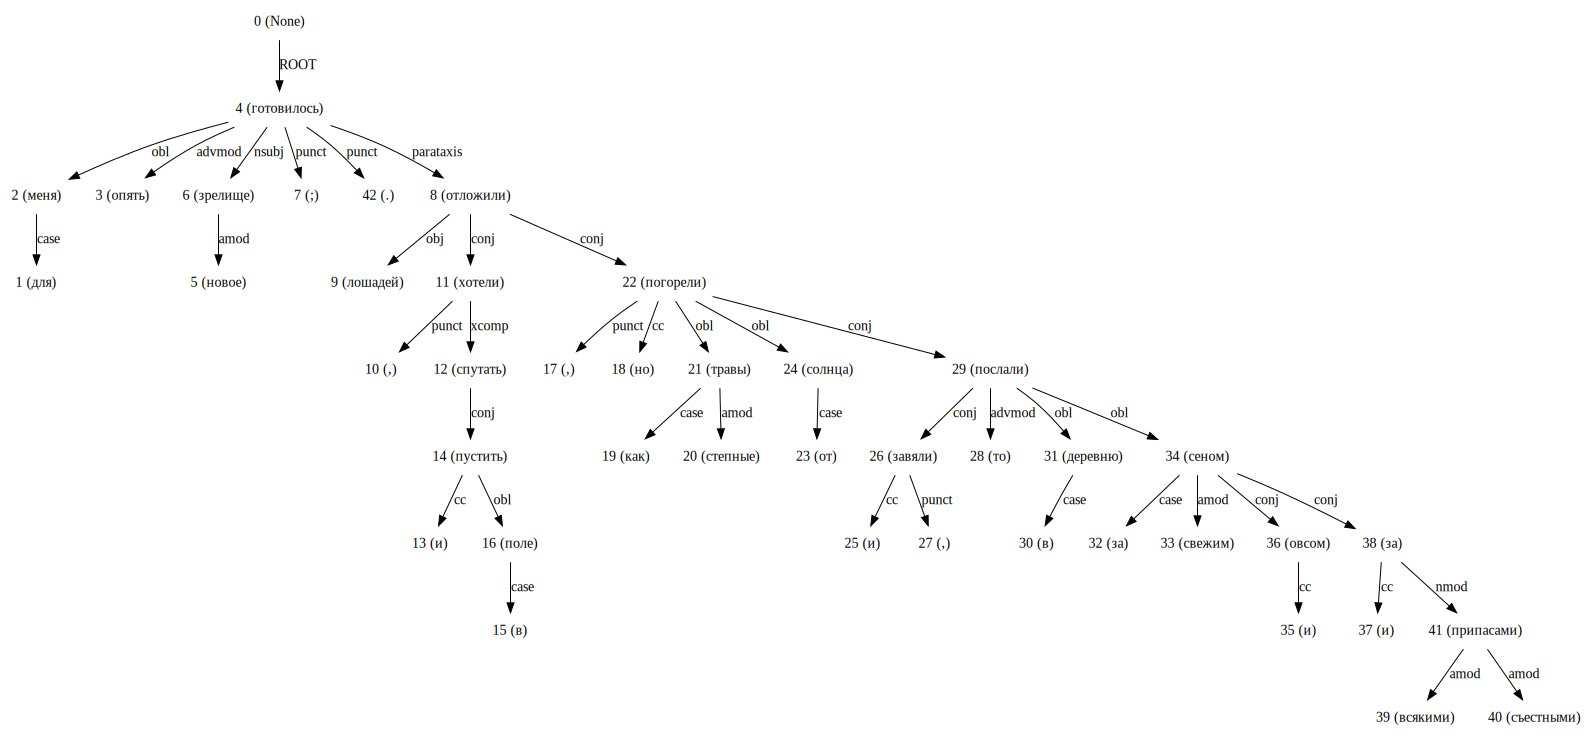

In [ ]:
# граф для нулевого предложения
# чтобы построить граф для некоторого предложения, необходимо задать его индекс вместо первого [0]
# ud_graph = DependencyGraph(tree_str=ud_parsed_orb[0][0])
# ud_graph

In [ ]:
# Посмотреть, какие отношения в предожении выделяются
# list(ud_graph.triples())

[(('думал', 'VERB'), 'nsubj', ('отец', 'NOUN')),
 (('думал', 'VERB'), 'ccomp', ('побоится', 'VERB')),
 (('побоится', 'VERB'), 'punct', (',', 'PUNCT')),
 (('побоится', 'VERB'), 'mark', ('что', 'SCONJ')),
 (('побоится', 'VERB'), 'nsubj', ('мать', 'NOUN')),
 (('побоится', 'VERB'), 'obj', ('сырости', 'NOUN')),
 (('сырости', 'NOUN'), 'amod', ('ночной', 'ADJ')),
 (('думал', 'VERB'), 'conj', ('находилось', 'VERB')),
 (('находилось', 'VERB'), 'punct', (';', 'PUNCT')),
 (('находилось', 'VERB'), 'cc', ('но', 'CCONJ')),
 (('находилось', 'VERB'), 'nsubj:pass', ('место', 'NOUN')),
 (('находилось', 'VERB'), 'aux:pass', ('было', 'AUX')),
 (('находилось', 'VERB'), 'advmod', ('необыкновенно', 'ADJ')),
 (('находилось', 'VERB'), 'nsubj', ('сухо', 'NOUN')),
 (('сухо', 'NOUN'), 'nmod', ('болот', 'NOUN')),
 (('болот', 'NOUN'), 'punct', (',', 'PUNCT')),
 (('болот', 'NOUN'), 'det', ('никаких', 'DET')),
 (('находилось', 'VERB'), 'punct', (',', 'PUNCT')),
 (('находилось', 'VERB'), 'cc', ('и', 'CCONJ')),
 (('нах

In [ ]:
# Отобразить граф в более читабельном виде
# ud_tree = ud_graph.tree()
# print(ud_tree.pretty_print())

## **Создание частотных списков словосочетаний с искомым словом**

In [ ]:
ud_graph_list = []
for i in ud_parsed_orb:
  ud_graph = DependencyGraph(tree_str=i[0]) # построили графы
  ud_graph_list.append(ud_graph) # сложили графы в список

### **Работа со словосочетанием "степь" + прилагательное**

In [ ]:
# Достаем все словосочетания слова "степь" с определением
phrase = []
for g in ud_graph_list:
  for i in list(g.triples()):
    if morph.parse(i[0][0])[0].normal_form == 'степь': # определяем, есть ли в сочетании слово "степь" на первом месте (индекс [0])
    if i[1] == 'amod': # определяем синтакическое отношение (индекс [1])
      phrase.append(i)
phrase

[(('степь', 'NOUN'), 'amod', ('башкирская', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('орловской', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('орловской', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('непочатая', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('дикие', 'ADJ')),
 (('степям', 'NOUN'), 'amod', ('ковылистым', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('зеленая', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('душистая', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('ровная', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('зеленую', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('скучную', 'ADJ')),
 (('степям', 'NOUN'), 'amod', ('раздольным', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('полевая', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('ковылистой', 'ADJ')),
 (('степь', 'NOUN'), 'amod', ('-', 'PUNCT')),
 (('степь', 'NOUN'), 'amod', ('полевая', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('многие', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('чистоковылистой', 'ADJ')),
 (('степи', 'NOUN'), 'amod', ('ковылистые', 'ADJ')),
 (('степи', 'NOUN'), 'amod

In [ ]:
# собираем в словосочетание (берем нулевой элемент нулевого элемента и нулевой элемент второго элемента)
result = []
for i in phrase:
    r = i[0][0] + ' ' + i[2][0]
    result.append(r)
result

['степь башкирская',
 'степи орловской',
 'степи орловской',
 'степь непочатая',
 'степи дикие',
 'степям ковылистым',
 'степь зеленая',
 'степь душистая',
 'степь ровная',
 'степь зеленую',
 'степь скучную',
 'степям раздольным',
 'степь полевая',
 'степи ковылистой',
 'степь -',
 'степь полевая',
 'степи многие',
 'степи чистоковылистой',
 'степи ковылистые',
 'степи родной',
 'степях открытых',
 'степи нераспаханной',
 'степи ковылистой',
 'степях настоящих',
 'степь скошенная',
 'степи зеленые',
 'степях паленых',
 'степи зеленой',
 'степи голые',
 'степи чистой',
 'степи неприветливой',
 'степью голые',
 'степь бескрайняя',
 'степей далеких',
 'степей придонских',
 'степи бескрайней',
 'степь уральская',
 'степь голую',
 'степь хмурую',
 'степи широкой',
 'степях полуденных',
 'степь уральскую',
 'степи бесплодной',
 'степь необозримую',
 'степь вольная',
 'степи волнистой',
 'степей киргизских',
 'степи вольной',
 'степи вольной',
 'степи родной',
 'степь вольная',
 'степи немеже

In [ ]:
# лемматизация словосочетаний, чтобы подсчитать количество одинаковых
result_lem = []
for l in result:
  lem = m.lemmatize(l)
  lemmas = (''.join(lem))
  lemmas = lemmas.replace("\n", "")
  result_lem.append(lemmas)
result_lem

['степь башкирский',
 'степь орловский',
 'степь орловский',
 'степь непочатый',
 'степь дикий',
 'степь ковылистый',
 'степь зеленый',
 'степь душистый',
 'степь ровный',
 'степь зеленый',
 'степь скучный',
 'степь раздольный',
 'степь полевой',
 'степь ковылистый',
 'степь -',
 'степь полевой',
 'степь многие',
 'степь чистоковылистый',
 'степь ковылистый',
 'степь родной',
 'степь открытый',
 'степь нераспаханный',
 'степь ковылистый',
 'степь настоящий',
 'степь скашивать',
 'степь зеленый',
 'степь паленый',
 'степь зеленый',
 'степь голый',
 'степь чистый',
 'степь неприветливый',
 'степь голый',
 'степь бескрайний',
 'степь далекий',
 'степь придонский',
 'степь бескрайний',
 'степь уральский',
 'степь голый',
 'степь хмурый',
 'степь широкий',
 'степь полуденный',
 'степь уральский',
 'степь бесплодный',
 'степь необозримый',
 'степь вольная',
 'степь волнистый',
 'степь киргизский',
 'степь вольный',
 'степь вольный',
 'степь родной',
 'степь вольная',
 'степь немежевывать',
 

In [ ]:
# len(result_lem)

190

In [ ]:
# подсчет одинаковых словосочетаний
c = dict(Counter(result_lem))
c
# len(c)

{'степь башкирский': 1,
 'степь орловский': 2,
 'степь непочатый': 1,
 'степь дикий': 2,
 'степь ковылистый': 4,
 'степь зеленый': 5,
 'степь душистый': 1,
 'степь ровный': 3,
 'степь скучный': 1,
 'степь раздольный': 2,
 'степь полевой': 2,
 'степь -': 1,
 'степь многие': 1,
 'степь чистоковылистый': 1,
 'степь родной': 5,
 'степь открытый': 5,
 'степь нераспаханный': 1,
 'степь настоящий': 1,
 'степь скашивать': 1,
 'степь паленый': 1,
 'степь голый': 5,
 'степь чистый': 1,
 'степь неприветливый': 2,
 'степь бескрайний': 2,
 'степь далекий': 4,
 'степь придонский': 1,
 'степь уральский': 6,
 'степь хмурый': 1,
 'степь широкий': 7,
 'степь полуденный': 1,
 'степь бесплодный': 1,
 'степь необозримый': 2,
 'степь вольная': 2,
 'степь волнистый': 1,
 'степь киргизский': 19,
 'степь вольный': 8,
 'степь немежевывать': 1,
 'степь безграничный': 2,
 'степь ковыльный': 1,
 'степь неделять': 1,
 'степь снежный': 1,
 'степь неделена': 1,
 'степь юго': 1,
 'степь древний': 1,
 'степь горячий': 

In [ ]:
# создание таблицы количества словосочетаний
df1 = pd.DataFrame.from_dict (c, orient='index'). reset_index()
df1.columns = ['фраза', 'количество']
df1

,фраза,количество
0,степь башкирский,1
1,степь орловский,2
2,степь непочатый,1
3,степь дикий,2
4,степь ковылистый,4
...,...,...
108,степь калмыцкий,1
109,степь видать,1
110,степь покрывать,1
111,степь обгорелый,1


In [ ]:
# запись таблицы в файл
df1.to_csv('steppe_adj.csv', encoding = "utf-8")

### **Работа со словосочетанием "степной" + существительное**

In [ ]:
phrase2 = []
for g in ud_graph_list:
  for i in list(g.triples()):
      if morph.parse(i[2][0])[0].normal_form == 'степной':
        if i[1] == 'amod':
            phrase2.append(i)
phrase2

[(('травы', 'NOUN'), 'amod', ('степные', 'ADJ')),
 (('трав', 'NOUN'), 'amod', ('степных', 'ADJ')),
 (('птица', 'NOUN'), 'amod', ('степная', 'ADJ')),
 (('дороги', 'NOUN'), 'amod', ('степной', 'ADJ')),
 (('дороги', 'NOUN'), 'amod', ('степной', 'ADJ')),
 (('местам', 'NOUN'), 'amod', ('степным', 'ADJ')),
 (('место', 'NOUN'), 'amod', ('степное', 'ADJ')),
 (('сторону', 'NOUN'), 'amod', ('степную', 'ADJ')),
 (('птица', 'NOUN'), 'amod', ('степная', 'ADJ')),
 (('реки', 'NOUN'), 'amod', ('степные', 'ADJ')),
 (('жеребец', 'NOUN'), 'amod', ('степной', 'ADJ')),
 (('сенокосов', 'NOUN'), 'amod', ('степных', 'ADJ')),
 (('дороге', 'NOUN'), 'amod', ('степной', 'ADJ')),
 (('еще', 'NOUN'), 'amod', ('степную', 'ADJ')),
 (('пиголица', 'NOUN'), 'amod', ('степная', 'ADJ')),
 (('куликов', 'NOUN'), 'amod', ('степных', 'ADJ')),
 (('пиголицы', 'NOUN'), 'amod', ('степные', 'ADJ')),
 (('кулики', 'NOUN'), 'amod', ('степные', 'ADJ')),
 (('кулик', 'NOUN'), 'amod', ('степной', 'ADJ')),
 (('пиголица', 'NOUN'), 'amod', (

In [ ]:
result2 = []
for i in phrase2:
    r = i[0][0] + ' ' + i[2][0]
    result2.append(r)
result2

['травы степные',
 'трав степных',
 'птица степная',
 'дороги степной',
 'дороги степной',
 'местам степным',
 'место степное',
 'сторону степную',
 'птица степная',
 'реки степные',
 'жеребец степной',
 'сенокосов степных',
 'дороге степной',
 'еще степную',
 'пиголица степная',
 'куликов степных',
 'пиголицы степные',
 'кулики степные',
 'кулик степной',
 'пиголица степная',
 'озерам степным',
 'дичи степной',
 'дичи степной',
 'речек степных',
 'озерах степных',
 'озерах степных',
 'дичи степной',
 'дичи степной',
 'речками степными',
 'места степные',
 'сенокосы степные',
 'сырты степные',
 'трав степных',
 'воздуха степного',
 'кочи степные',
 'корма степного',
 'воздуха степного',
 'пожары степные',
 'пожары степные',
 'птиц степных',
 'кустарник степной',
 'птица степная',
 'места степные',
 'даль степную',
 'лиса степная',
 'местах степных',
 'дичью степною',
 'дичи степной',
 'дичи степной',
 'дорог степных',
 'местам степным',
 'птицею степною',
 'местах степных',
 'мест степ

In [ ]:
result_lem2 = []
for l in result2:
  lem = m.lemmatize(l)
  lemmas = (''.join(lem))
  lemmas = lemmas.replace("\n", "")
  result_lem2.append(lemmas)
result_lem2

['трава степной',
 'трава степной',
 'птица степной',
 'дорога степной',
 'дорога степной',
 'место степной',
 'место степной',
 'сторона степной',
 'птица степной',
 'река степной',
 'жеребец степной',
 'сенокос степной',
 'дорога степной',
 'еще степной',
 'пиголица степной',
 'кулик степной',
 'пиголица степной',
 'кулик степной',
 'кулик степной',
 'пиголица степной',
 'озеро степной',
 'дичь степной',
 'дичь степной',
 'речка степной',
 'озеро степной',
 'озеро степной',
 'дичь степной',
 'дичь степной',
 'речка степной',
 'место степной',
 'сенокос степной',
 'сырт степной',
 'трава степной',
 'воздух степной',
 'кочи степной',
 'корма степной',
 'воздух степной',
 'пожар степной',
 'пожар степной',
 'птица степной',
 'кустарник степной',
 'птица степной',
 'место степной',
 'даль степной',
 'лиса степной',
 'место степной',
 'дичь степной',
 'дичь степной',
 'дичь степной',
 'дорога степной',
 'место степной',
 'птица степной',
 'место степной',
 'место степной',
 'трава степной

In [ ]:
c2 = dict(Counter(result_lem2))
c2

{'трава степной': 6,
 'птица степной': 5,
 'дорога степной': 17,
 'место степной': 10,
 'сторона степной': 2,
 'река степной': 7,
 'жеребец степной': 1,
 'сенокос степной': 3,
 'еще степной': 1,
 'пиголица степной': 4,
 'кулик степной': 18,
 'озеро степной': 6,
 'дичь степной': 9,
 'речка степной': 7,
 'сырт степной': 5,
 'воздух степной': 3,
 'кочи степной': 1,
 'корма степной': 1,
 'пожар степной': 3,
 'кустарник степной': 4,
 'даль степной': 2,
 'лиса степной': 2,
 'луг степной': 3,
 'птичка степной': 1,
 'луговина степной': 2,
 'какой степной': 1,
 'орел степной': 1,
 'простор степной': 9,
 'комбайн степной': 1,
 'зелень степной': 1,
 'поход степной': 1,
 'поиск степной': 1,
 'раздолье степной': 2,
 'хутор степной': 4,
 'житель степной': 1,
 'могила степной': 1,
 'хуторок степной': 2,
 'оседлость степной': 1,
 'поселок степной': 3,
 'богач степной': 1,
 'ширь степной': 2,
 'народ степной': 1,
 'умет степной': 1,
 'скакун степной': 1,
 'мгла степной': 1,
 'ветер степной': 5,
 'пыль 

In [ ]:
df2 = pd.DataFrame.from_dict (c2, orient='index'). reset_index()
df2.columns = ['фраза', 'количество']
df2

,фраза,количество
0,трава степной,6
1,птица степной,5
2,дорога степной,17
3,место степной,10
4,сторона степной,2
...,...,...
133,ваш степной,1
134,закат степной,1
135,год степной,1
136,зарево степной,1


In [ ]:
df2.to_csv('steppe_noun.csv', encoding = "utf-8")

### **Работа со словосочетанием "степь" + глагол**

In [ ]:
phrase3 = []
for g in ud_graph_list:
  for i in list(g.triples()):
      if morph.parse(i[2][0])[0].normal_form == 'степь':
        if i[1] == 'nsubj':
          phrase3.append(i)
phrase3

[(('начиналась', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('окружала', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('была', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('тиха', 'NOUN'), 'nsubj', ('степь', 'NOUN')),
 (('оглашались', 'VERB'), 'nsubj', ('степи', 'NOUN')),
 (('приводила', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('понравится', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('собираясь', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('действительно', 'ADV'), 'nsubj', ('степи', 'NOUN')),
 (('таковы', 'NOUN'), 'nsubj', ('степи', 'NOUN')),
 (('населяются', 'VERB'), 'nsubj', ('степи', 'NOUN')),
 (('пропадают', 'VERB'), 'nsubj', ('степи', 'NOUN')),
 (('остались', 'VERB'), 'nsubj', ('степи', 'NOUN')),
 (('распахана', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('слышит', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('лежит', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('говорит', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('развертывает', 'VERB'), 'nsubj', ('степь', 'NOUN')),
 (('сказал', 'VERB'), 'nsubj', ('степь', '

In [ ]:
result3 = []
for i in phrase3:
    r = i[0][0] + ' ' + i[2][0]
    result3.append(r)
result_lem3 = []
for l in result3:
  lem = m.lemmatize(l)
  lemmas = (''.join(lem))
  lemmas = lemmas.replace("\n", "")
  result_lem3.append(lemmas)
result_lem3

['начинаться степь',
 'окружать степь',
 'быть степь',
 'тихий степь',
 'оглашаться степь',
 'приводить степь',
 'понравиться степь',
 'собираться степь',
 'действительно степь',
 'таков степь',
 'населяться степь',
 'пропадать степь',
 'оставаться степь',
 'распахать степь',
 'слышать степь',
 'лежать степь',
 'говорить степь',
 'развертывать степь',
 'сказать степь',
 'мачеха степь',
 'дремать степь',
 'тот степь',
 'пожар степь',
 'мы степь',
 'закутываться степь',
 'распахивать степь',
 'млеть степь',
 'подыматься степь',
 'грезить степь',
 'сделать степь',
 'убаюкивать степь',
 'всасывать степь',
 'отвечать степь',
 'кругом степь',
 'встречать степь',
 'стемнеть степь',
 'глядеть степь',
 'обнимать степь',
 'быть степь',
 'материнский степь',
 'расстилаться степь',
 'вскидываться степь',
 'рисоваться степь',
 'лежать степь',
 'вдали степь',
 'порозоветь степь',
 'большой степь',
 'слать степь',
 'становиться степь',
 'зыбиться степь',
 'урал степь',
 'видный степь',
 'расстилаться

In [ ]:
c3 = dict(Counter(result_lem3))
c3

{'начинаться степь': 1,
 'окружать степь': 1,
 'быть степь': 2,
 'тихий степь': 1,
 'оглашаться степь': 1,
 'приводить степь': 1,
 'понравиться степь': 1,
 'собираться степь': 1,
 'действительно степь': 1,
 'таков степь': 1,
 'населяться степь': 1,
 'пропадать степь': 1,
 'оставаться степь': 1,
 'распахать степь': 1,
 'слышать степь': 1,
 'лежать степь': 3,
 'говорить степь': 1,
 'развертывать степь': 1,
 'сказать степь': 1,
 'мачеха степь': 1,
 'дремать степь': 1,
 'тот степь': 1,
 'пожар степь': 1,
 'мы степь': 1,
 'закутываться степь': 1,
 'распахивать степь': 1,
 'млеть степь': 1,
 'подыматься степь': 1,
 'грезить степь': 1,
 'сделать степь': 1,
 'убаюкивать степь': 1,
 'всасывать степь': 1,
 'отвечать степь': 1,
 'кругом степь': 1,
 'встречать степь': 1,
 'стемнеть степь': 1,
 'глядеть степь': 1,
 'обнимать степь': 1,
 'материнский степь': 1,
 'расстилаться степь': 2,
 'вскидываться степь': 1,
 'рисоваться степь': 2,
 'вдали степь': 1,
 'порозоветь степь': 1,
 'большой степь': 2,


In [ ]:
df3 = pd.DataFrame.from_dict (c3, orient='index'). reset_index()
df3.columns = ['фраза', 'количество']
df3

,фраза,количество
0,начинаться степь,1
1,окружать степь,1
2,быть степь,2
3,тихий степь,1
4,оглашаться степь,1
5,приводить степь,1
6,понравиться степь,1
7,собираться степь,1
8,действительно степь,1
9,таков степь,1


In [ ]:
df3.to_csv('steppe_verb.csv', encoding = "utf-8")

# **Варианты кода, которые не пригодились**

In [ ]:
# f = open('steppe_adj.txt', 'w')
# f.write(res)
# f.close()

In [ ]:
# cleaning target sentences from extra parts with
# target_sent_orb2 = []
# for i in target_sent_orb:
#     n = i.find('\n\t\t')
#     if n != -1:
#         i = i[0:n]+" "+ i[n+3:]
#         target_sent_orb2.append(i)
#     else:
#         target_sent_orb2.append(i)
# # len(target_sent_orb2)

In [ ]:
# # cleaning target sentences from extra parts with
# target_sent_orb3 = []
# for i in target_sent_orb2:
#     n = i.find('\xa0')
#     if n != -1:
#         i = i[0:n]
#         target_sent_orb3.append(i)
#     else:
#         target_sent_orb3.append(i)
# len(target_sent_orb2)

946

In [ ]:
# checking extra parts in target sentences
# for i in target_sent_orb2:
#     n = i.find('\n')
#     print(n)

In [ ]:
# strings = []
# for key,item in c.items():
#     strings.append("{}: {}".format(key.capitalize(), item))
# steppe_adj_count = ", ".join(strings)
# print(steppe_adj_count)

Степь башкирский: 1, Степь орловский: 2, Степь непочатый: 1, Степь дикий: 2, Степь ковылистый: 4, Степь зеленый: 5, Степь душистый: 1, Степь ровный: 3, Степь скучный: 1, Степь раздольный: 2, Степь полевой: 2, Степь -: 1, Степь многие: 1, Степь чистоковылистый: 1, Степь родной: 5, Степь открытый: 5, Степь нераспаханный: 1, Степь настоящий: 1, Степь скашивать: 1, Степь паленый: 1, Степь голый: 5, Степь чистый: 1, Степь неприветливый: 2, Степь бескрайний: 2, Степь далекий: 4, Степь придонский: 1, Степь уральский: 6, Степь хмурый: 1, Степь широкий: 7, Степь полуденный: 1, Степь бесплодный: 1, Степь необозримый: 2, Степь вольная: 2, Степь волнистый: 1, Степь киргизский: 19, Степь вольный: 8, Степь немежевывать: 1, Степь безграничный: 2, Степь ковыльный: 1, Степь неделять: 1, Степь снежный: 1, Степь неделена: 1, Степь юго: 1, Степь древний: 1, Степь горячий: 1, Степь знойный: 1, Степь померкнуть: 1, Степь илецкий: 2, Степь пустой: 1, Степь ясный: 1, Степь бледный: 1, Степь засыпать: 1, Степь

In [ ]:
# ud = conllu_to_list(parsed1)
# ud

['1\tкак\tКАК\tADP\tIN\t_\t2\tcase\t_\t_\n2\tогнепоклонник\tогнепоклонник\tNOUN\tNN\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing\t4\tnsubj\t_\tSpaceAfter=No\n3\t,\t,\tPUNCT\t,\t_\t2\tpunct\t_\t_\n4\tготов\tГОТОВЫЙ\tADJ\tJJH\tAnimacy=Anim|Case=Nom|Gender=Masc|Number=Sing|Variant=Short\t0\tROOT\t_\t_\n5\tчасами\tчаСАМ\tNOUN\tNN\tAnimacy=Inan|Case=Ins|Gender=Masc|Number=Plur\t7\tiobj\t_\t_\n6\tя\tЙ\tPRON\tPRP\tCase=Nom|Number=Sing|Person=1\t7\tnsubj\t_\t_\n7\tсидеть\tсидеть\tVERB\tVB\tAspect=Perf|VerbForm=Inf\t4\txcomp\t_\t_\n8\tу\tУ\tADP\tIN\t_\t9\tcase\t_\t_\n9\tкостра\tкостра\tNOUN\tNN\tAnimacy=Inan|Case=Gen|Gender=Masc|Number=Sing\t7\tobl\t_\tSpaceAfter=No\n10\t,\t,\tPUNCT\t,\t_\t11\tpunct\t_\t_\n11\tслушать\tслушать\tVERB\tVB\tAspect=Imp|VerbForm=Inf\t7\tconj\t_\t_\n12\tего\tЕГО\tPRON\tPRP\tCase=Acc|Gender=Masc|Number=Sing|Person=3\t11\tobj\t_\t_\n13\tи\tИ\tCCONJ\tCC\t_\t14\tcc\t_\t_\n14\tмолчаливую\tмолчаливую\tADJ\tJJL\tAnimacy=Inan|Case=Acc|Gender=Fem|Number=Sing\t7\tconj\t_\tSp

In [ ]:
# вызовем для результата UDPipe:
# ud_orb = []
# for i in parsed_orb:
#   ud = conllu_to_list(i) # превратили в лист
#   ud_orb.append(i)
# ud_orb